# Decision Tree 실습  
- 참조 코드

  1)  https://teddylee777.github.io/scikit-learn/scikit-learn-decision-tree-entropy-gini
  
  2) DSL 6기 황다연 님의 [22-1] Decision Tree 세션 코드

  3) https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

  4) https://techblog-history-younghunjo1.tistory.com/102

  5) https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-1

# 1. Entropy, Gini Index

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- 엔트로피 수식의 이해

In [ ]:
# Entropy 구현
def entropy(x):
    return (-x*np.log2(x)).sum()

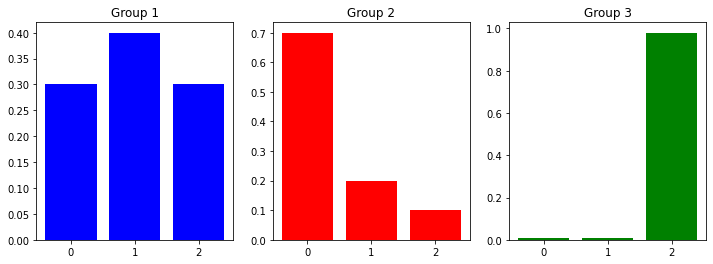

In [ ]:
# 샘플데이터 생성
group_1 = np.array([0.3, 0.4, 0.3])
group_2 = np.array([0.7, 0.2, 0.1])
group_3 = np.array([0.01, 0.01, 0.98])

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
axes[0].bar(np.arange(3), group_1, color='blue')
axes[0].set_title('Group 1')
axes[1].bar(np.arange(3), group_2, color='red')
axes[1].set_title('Group 2')
axes[2].bar(np.arange(3), group_3, color='green')
axes[2].set_title('Group 3')
plt.show()

In [ ]:
# 각 그룹의 Entropy 계산
entropy_1 = entropy(group_1)
entropy_2 = entropy(group_2)
entropy_3 = entropy(group_3)

print(f'Group 1: {entropy_1:.3f}\nGroup 2: {entropy_2:.3f}\nGroup 3: {entropy_3:.3f}')

Group 1: 1.571
Group 2: 1.157
Group 3: 0.161


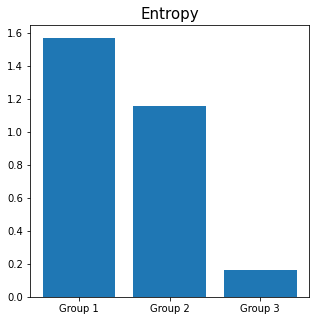

In [ ]:
# 각 그룹의 Entropy 시각화
plt.figure(figsize=(5, 5))
plt.bar(['Group 1', 'Group 2', 'Group 3'], [entropy_1, entropy_2, entropy_3])
plt.title('Entropy', fontsize=15)
plt.show()

# 데이터가 균일하지 않을수록 Entropy의 값이 큼

- Gini Index 수식의 이해

In [ ]:
# Gini Index 구현
def gini(x):
    return 1 - ((x / x.sum())**2).sum()

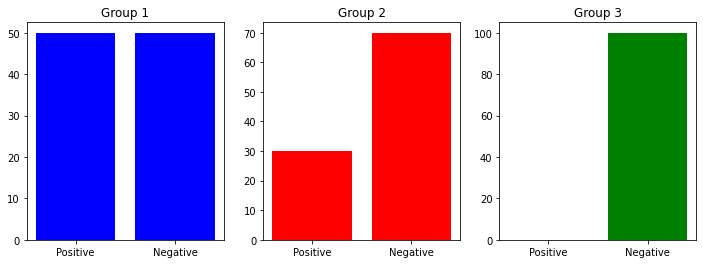

In [ ]:
# 샘플데이터 생성
group_1 = np.array([50, 50])
group_2 = np.array([30, 70])
group_3 = np.array([0, 100])

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
axes[0].bar(['Positive', 'Negative'], group_1, color='blue')
axes[0].set_title('Group 1')
axes[1].bar(['Positive', 'Negative'], group_2, color='red')
axes[1].set_title('Group 2')
axes[2].bar(['Positive', 'Negative'], group_3, color='green')
axes[2].set_title('Group 3')
plt.show()

In [ ]:
gini_1 = gini(group_1)
gini_2 = gini(group_2)
gini_3 = gini(group_3)

print(f'Group 1: {gini_1:.3f}\nGroup 2: {gini_2:.3f}\nGroup 3: {gini_3:.3f}')

Group 1: 0.500
Group 2: 0.420
Group 3: 0.000


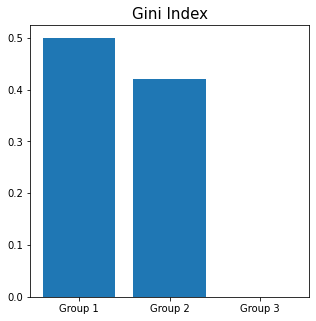

In [ ]:
plt.figure(figsize=(5, 5))
plt.bar(['Group 1', 'Group 2', 'Group 3'], [gini_1, gini_2, gini_3])
plt.title('Gini Index', fontsize=15)
plt.show()

# 데이터가 균일하지 않을수록 Gini Index의 값이 큼
# Negative class 100%인 Group 3는 Gini index = 0

## 2. Classification & Regression 기본 함수

- Classification

In [ ]:
# sklearn 패키지로부터 import tree 
from sklearn import tree

In [ ]:
# X, Y 데이터셋 임의 지정
X = [[0, 0], [1, 1]] # 두 개의 feature을 가지고 있음
Y = [0, 1] # class는 0 또는 1

In [ ]:
# classification tree 구축
clf = tree.DecisionTreeClassifier() # tree 객체에서 DecisionTreeClassifier()를 불러와서 clf에 저장

In [ ]:
clf = clf.fit(X, Y) # X,Y 데이터셋을 classification tree에 적합시키기

In [ ]:
# 구축된 tree에 새로운 item이 들어왔을 때 해당 item의 class를 예측
clf.predict([[2, 2]])

# 0,1의 클래스 중에서 1로 예측

array([1])

In [ ]:
# predict_proba의 출력은 각 클래스가 예측될 확률
clf.predict_proba([[2, 2]])

# 첫 번째 원소는 첫 번째 클래스의 예측 확률, 두 번째 원소는 두 번째 클래스의 예측 확률
# 확률이기 때문에 predict_proba의 출력은 항상 0과 1 사이의 값
# 두 클래스에 대한 확률의 합은 항상 1

array([[0., 1.]])

- Regression

In [ ]:
# X, Y 데이터셋 임의 지정
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]

In [ ]:
# regression tree 구축 및 적합
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

In [ ]:
# 구축된 tree에 새로운 item이 들어왔을 때 해당 item의 값을 예측
clf.predict([[1, 1]])

array([0.5])

## 3. Iris dataset 

- 모듈 불러오기

In [ ]:
from sklearn.datasets import load_iris # iris data
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz # export_graphviz: 그래프 저장용 텍스트 파일 포맷인 .dot 파일을 만듦

In [ ]:
# 트리 시각화를 위한 모듈 import
!pip install pydot

import pydot
from IPython.core.display import Image 

- 데이터 로드

In [ ]:
iris = load_iris() # 붓꽃 데이터셋

In [ ]:
iris.data[:10]  

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
print(iris.feature_names) # 독립변수 4개
print(iris.target_names) # 종속변수 3개의 class

#  종속변수가 범주형 변수 -> 분류 트리를 만들어야 함

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [ ]:
X, y = iris.data, iris.target

- 트리 생성

In [ ]:
 # classification tree 구축 및 적합
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

- 트리 시각화

In [ ]:
dot_data = export_graphviz(clf, out_file = None, # out_file: 파일로 내보내고자 하는 것이 아니라 직접 그리기 때문에 None
                                feature_names = iris.feature_names,
                                class_names = iris.target_names,
                                filled = True, # 색 넣어줌
                                rounded = True, # 반올림
                                special_characters = True) # 특수문자를 대비해서 넣어주는 옵션

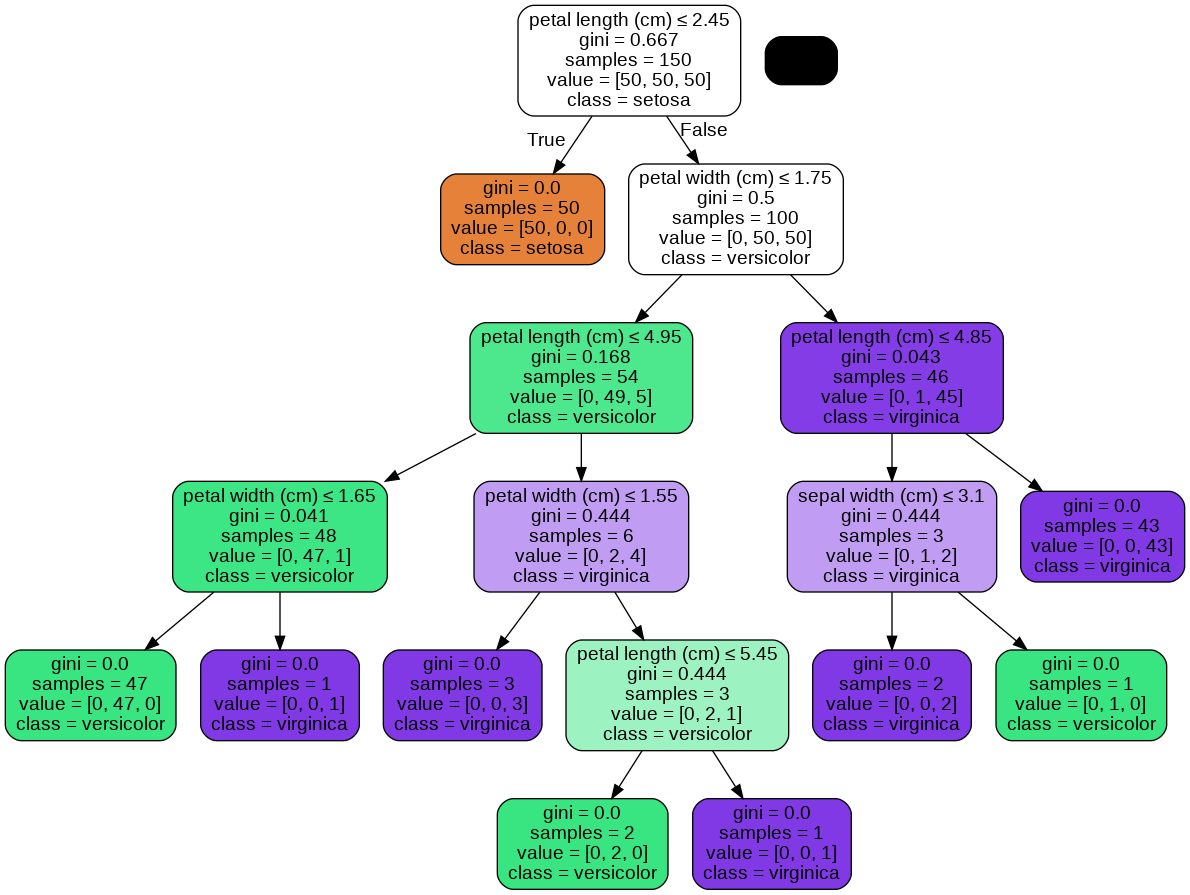

In [ ]:
graph = pydot.graph_from_dot_data(dot_data)[0]
image = graph.create_png()
Image(image)
# 같은 색 계열이면 같은 집단으로 분류된 것

In [ ]:
# 함수로 만듦
def draw_decision_tree(clf, feature_names = None, class_names = None):
    dot_data = export_graphviz(clf, out_file = None, 
                                feature_names = feature_names,
                                class_names = class_names,
                                filled = True, 
                                rounded = True,
                                special_characters = True)
    graph = pydot.graph_from_dot_data(dot_data)[0]
    image = graph.create_png()
    return Image(image)

너무 자세하게 분류를 하고 있음. 오버피팅이 될 위험이 있음.

### Pruning: 사전 가지치기
- 여러 parameters 이용

    - max_depth: 트리의 최대 depth를 결정

    - min_samples_split: split하기 위해 노드가 가지고 있어야 하는 최소 샘플 개수

    - min_samples_leaf: leaf node가 가져야 하는 최소 샘플 개수

    - max_leaf_nodes: leaf node의 최대 개수

1. max_depth

In [ ]:
feature_names = iris.feature_names
class_names = iris.target_names

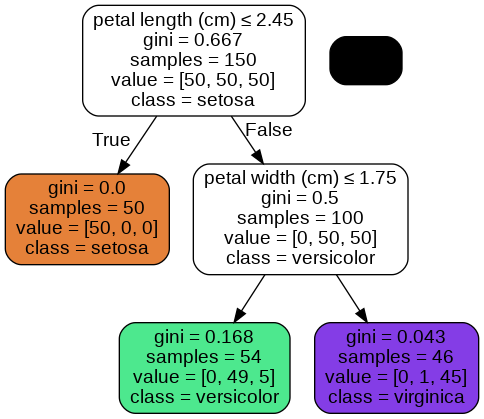

In [ ]:
# 트리의 최대 depth를 결정
clf = DecisionTreeClassifier(max_depth = 2)
tree = clf.fit(X, y)
draw_decision_tree(tree, feature_names, class_names)

# max_depth 값을 입력하지 않을 경우, 모든 leaf가 pure해질때까지 혹은,
# 분기된 노드 속 샘플수가 설정한 최소 샘플수(min_samples_split)보다 적게 될때까지 분기함

2. min_samples_split

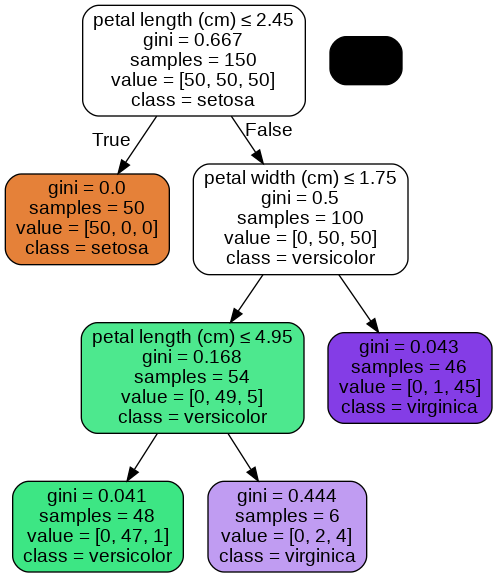

In [ ]:
# split하기 위해 노드가 가지고 있어야 하는 최소 샘플 개수를 설정
clf = DecisionTreeClassifier(min_samples_split = 50)
tree = clf.fit(X, y)
draw_decision_tree(tree, feature_names, class_names)

# 최소 개수보다 node 내 샘플 수가 적으면 leaf가 pure하지 않더라도 분기를 멈춤
# float 입력 시, 전체 샘플 개수 대비 float 비율만큼의 개수로 최소 샘플수가 설정됨

3. min_samples_leaf

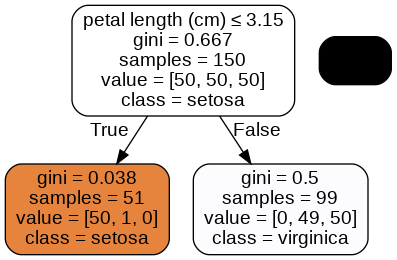

In [ ]:
# leaf node가 가져야 하는 최소 샘플 개수를 설정
clf = DecisionTreeClassifier(min_samples_leaf = 51)
tree = clf.fit(X, y)
draw_decision_tree(tree, feature_names, class_names)

# 왼쪽 혹은 오른쪽 branch에 각각 min_samples_leaf만큼 훈련 샘플이 있어야 분기가 됨

4. max_leaf_nodes

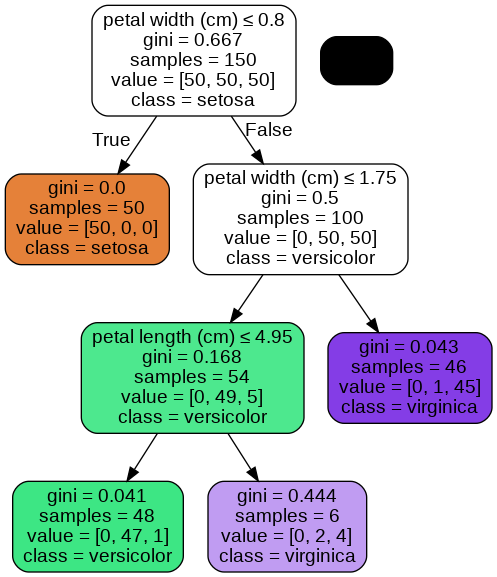

In [ ]:
# leaf node의 최대 개수를 설정
clf = DecisionTreeClassifier(max_leaf_nodes = 4)
tree = clf.fit(X, y)
draw_decision_tree(tree, feature_names, class_names)

## 4.  Breast Cancer dataset 

- 데이터셋 로드

In [ ]:
from sklearn.datasets import load_breast_cancer # 유방암 데이터셋

X, y = load_breast_cancer(return_X_y=True)
feature_names = load_breast_cancer().feature_names
class_names = load_breast_cancer().target_names

In [ ]:
print(feature_names) # 독립변수
print(class_names) # 종속변수: 2개의 class

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # random_state: 추정기의 무작위성 제어
# 알고리즘은 실행마다 값이 변하기 때문에 값 변화를 보기 힘듦
# 하지만 random_state를 고정하면 값 변화를 살펴보고 모델의 성능 개선에 대한 판단을 내릴 수 있음

In [ ]:
# Pruning 되기 전 
clf = DecisionTreeClassifier(random_state=0)
tree_nottuned = clf.fit(X_train, y_train)

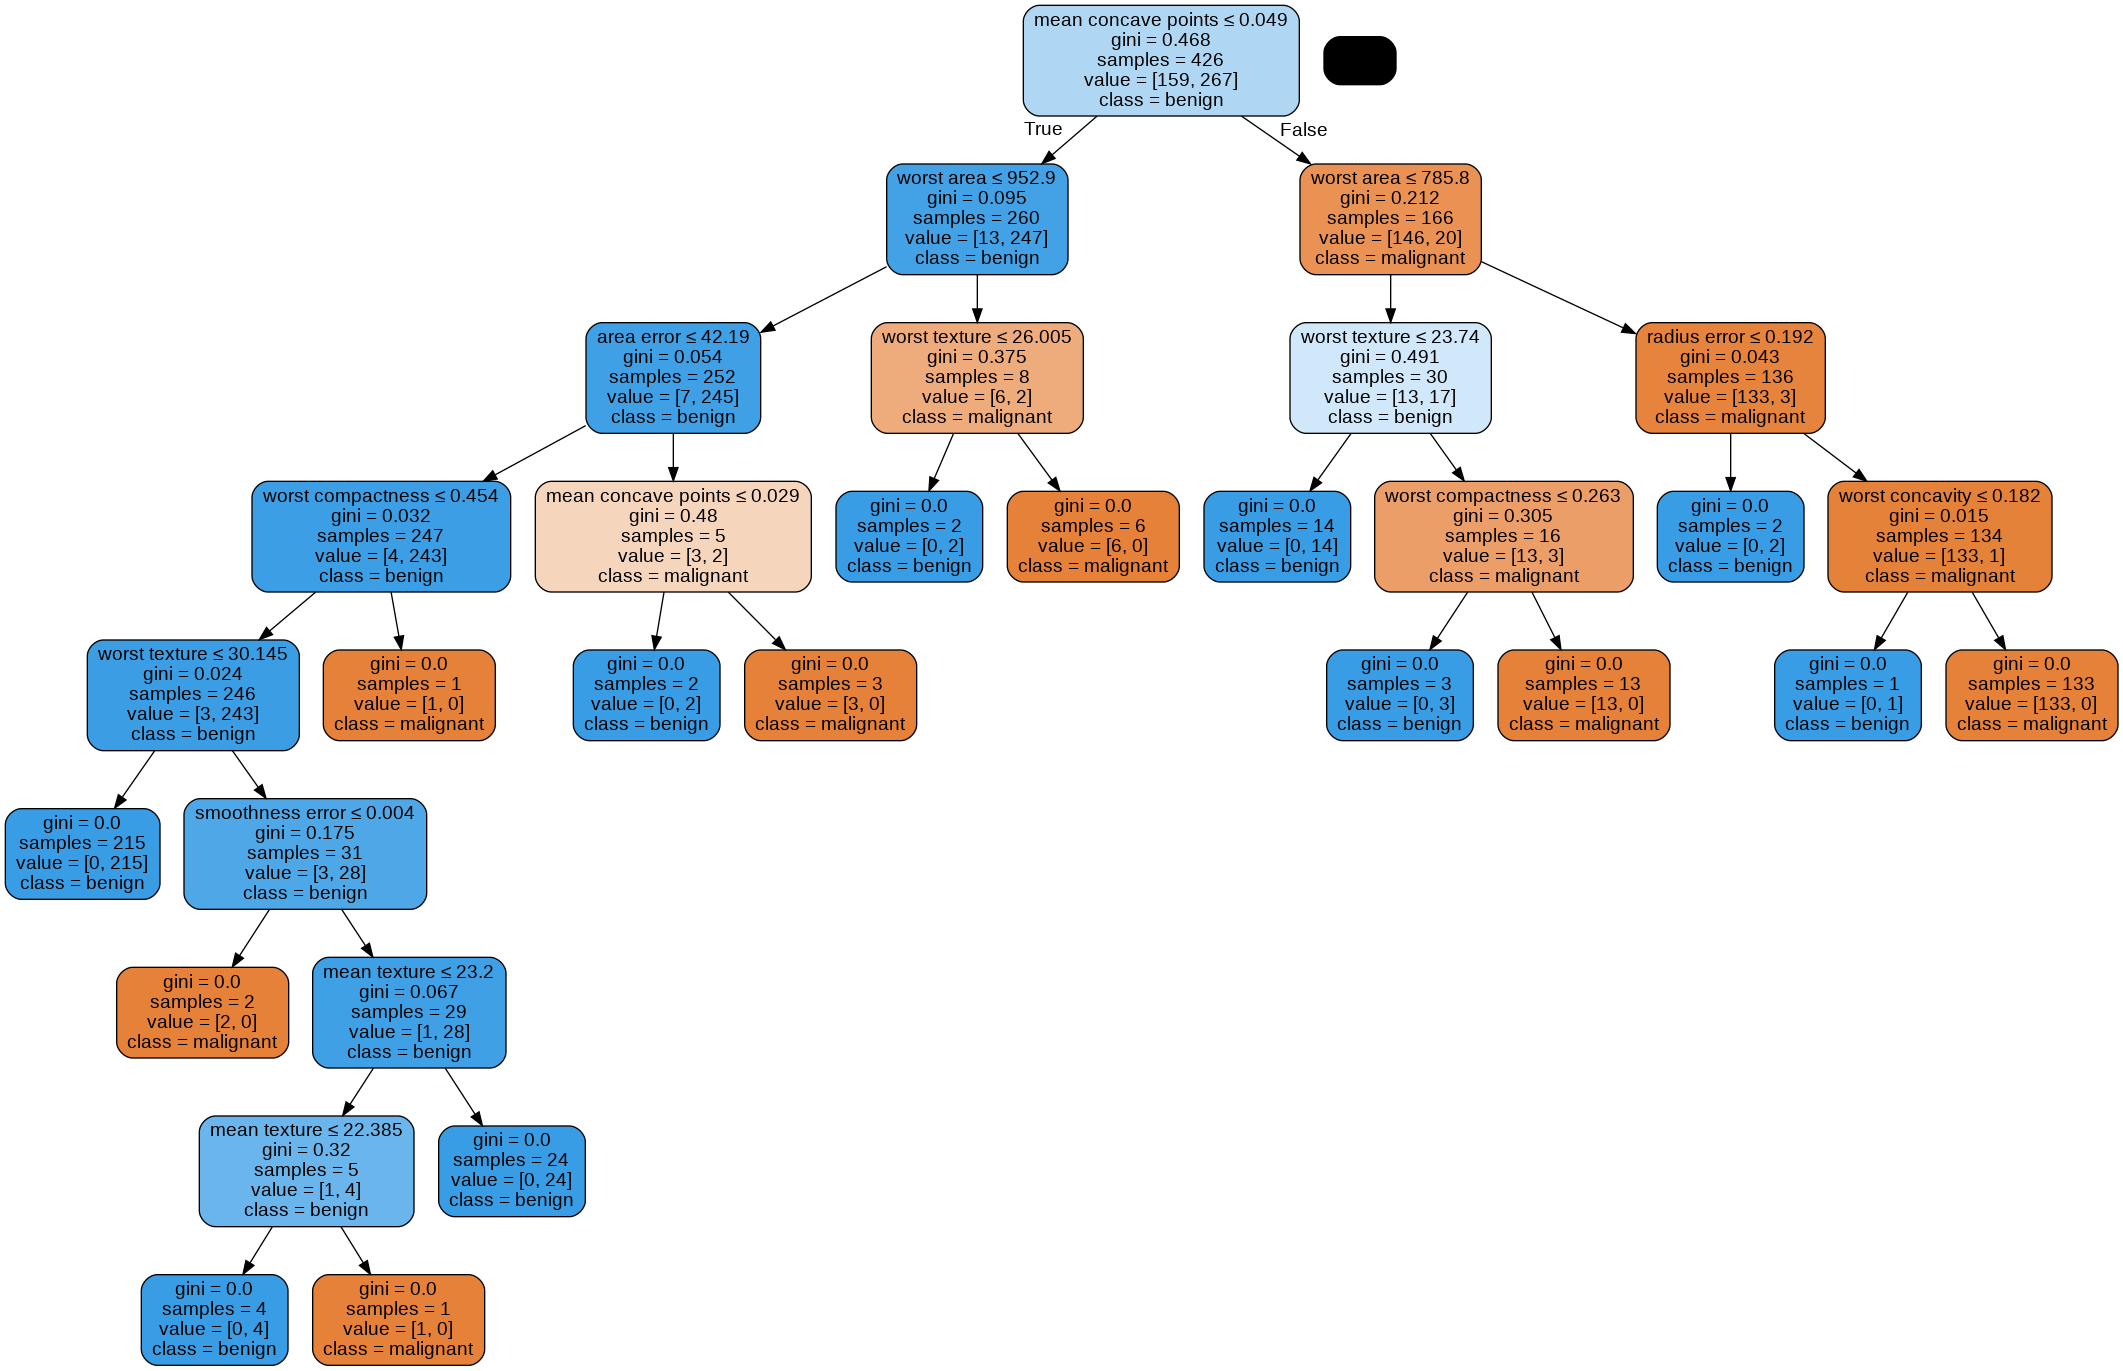

In [ ]:
draw_decision_tree(tree_nottuned, feature_names, class_names)

sample 1~2개 인 것이 있음 -> overfitting 되었을거라고 추정

### 사전 가지치기: hyperparameter tuning (Grid Search)

- 위에서는 parameter를 임의로 설정했었음
- 사전 가지치기에서 좋은 parameter 값을 찾아보자
-  튜닝을 통해 모델의 과적합을 방지하고 모델 스코어를 올릴 수 있음

In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np
scoring = ['f1','precision','recall']
tree_scores = cross_validate(tree_nottuned, X_train, y_train, scoring=scoring, cv=5, return_train_score = False)

print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(tree_scores['test_f1'])))

parameter가 tuning 되지 않았을 때의 F1 Score : 0.923


- max_depth, min_samples_split에 대한 hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV # 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도하여 최적의 매개변수를 찾는 방법

# GridSearch는 확인하고 싶은 다양한 파라미터값을 넣어주면
# 그것들을 하나씩 확인하면서 스코어를 내고 가장 좋은 성능의 모델에 대한 결과를 확인하고 사용할 수 있음

In [ ]:
# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의
# max_depth 와 min_samples_split라는 parameter에 대해 범위 지정
hyperparamters = {'max_depth': list(range(2, 8)),  'min_samples_split': list(range(2, 20))}

# GridSearch 진행
GridCV = GridSearchCV(estimator=tree_nottuned, param_grid=hyperparamters, cv=5, verbose=1)

GridCV.fit(X_train, y_train)
GridCV.best_params_ # 가장 좋은 성능을 보였을 때의 parameter

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'max_depth': 7, 'min_samples_split': 4}

In [ ]:
tree_tuned = DecisionTreeClassifier(max_depth=7, min_samples_split=4, random_state=0)
tree_tuned_scores = cross_validate(tree_tuned, X_train, y_train, scoring=scoring, cv=5, return_train_score = False)

print("Tree parameter after hyperparameter tuning - F1 Score : {:.3f}".format(np.mean(tree_tuned_scores['test_f1'])))

# tuning 전의 성능보다 좋아졌음을 확인 가능

Tree parameter after hyperparameter tuning - F1 Score : 0.935


### 사후 가지치기: cost complexity pruning  
- 사후 가지치기: full tree (terminal node의 순도 100%) 를 만든 후에 구분된 영역을 통합
- ccp_alpha: Complexity parameter used for Minimal Cost-Complexity Pruning 
- ccp_alpha를 0부터 시작해서 크기를 늘려나감, ccp_alpha의 임계치(effective alpha)를 지나면 가지치기
- ccp_alpha의 값이 커지면, L(T)가 조금만 많아도 CC(T) 값이 확 커져버리기 때문에 가지를 많이 쳐내서 단순한 모델을 만들게 되는 것
- effective alpha 값이 작은 순서대로 가지치기
- 남아있는 effective alpha 값이 ccp_alpha보다 크면 가지치기 종료
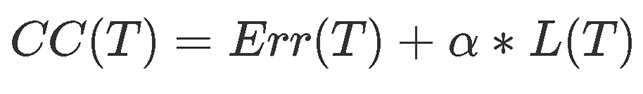

sklearn의 cost complexity pruning 함수를 사용하기 위해서는 버전을 업데이트 필요 (최소한 0.22.1버전 요구)

In [ ]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


In [ ]:
import matplotlib.pyplot as plt

- Total impurity of leaves vs effective alphas of pruned tree
  - DecisionTreeClassifier.cost_complexity_pruning_path returns the **effective alphas** and the **corresponding total leaf impurities** at each step of the pruning process.
  - alpha가 커지면, 결과적으로 total impurity of leaves 커짐

In [ ]:
clf = DecisionTreeClassifier(random_state=0)

path = clf.cost_complexity_pruning_path(X_train, y_train)

# effective alphas, corresponding total leaf impurities 구하기
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

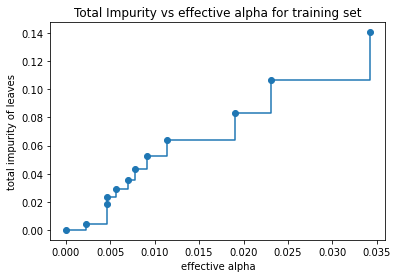

In [ ]:
# effective alpha값에 따른 total impurity of leaves 그래프

fig, ax = plt.subplots()
# plt.subplots() 편의 함수는 Figure 객체를 생성하고 Figure.subplots()를 호출하여 리턴
# axes: 좌표평면을 나타내는 변수

# ccp_alphas[-1]은 노드가 하나밖에 없는 트리임.
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

# alpha 값이 커지면 트리가 작아짐 -> total impurity of leaves 커짐

- 각 effective alphas 이용해 decision tree 만들기

Number of nodes in the 1th tree is: 31 with ccp_alpha: 0.0


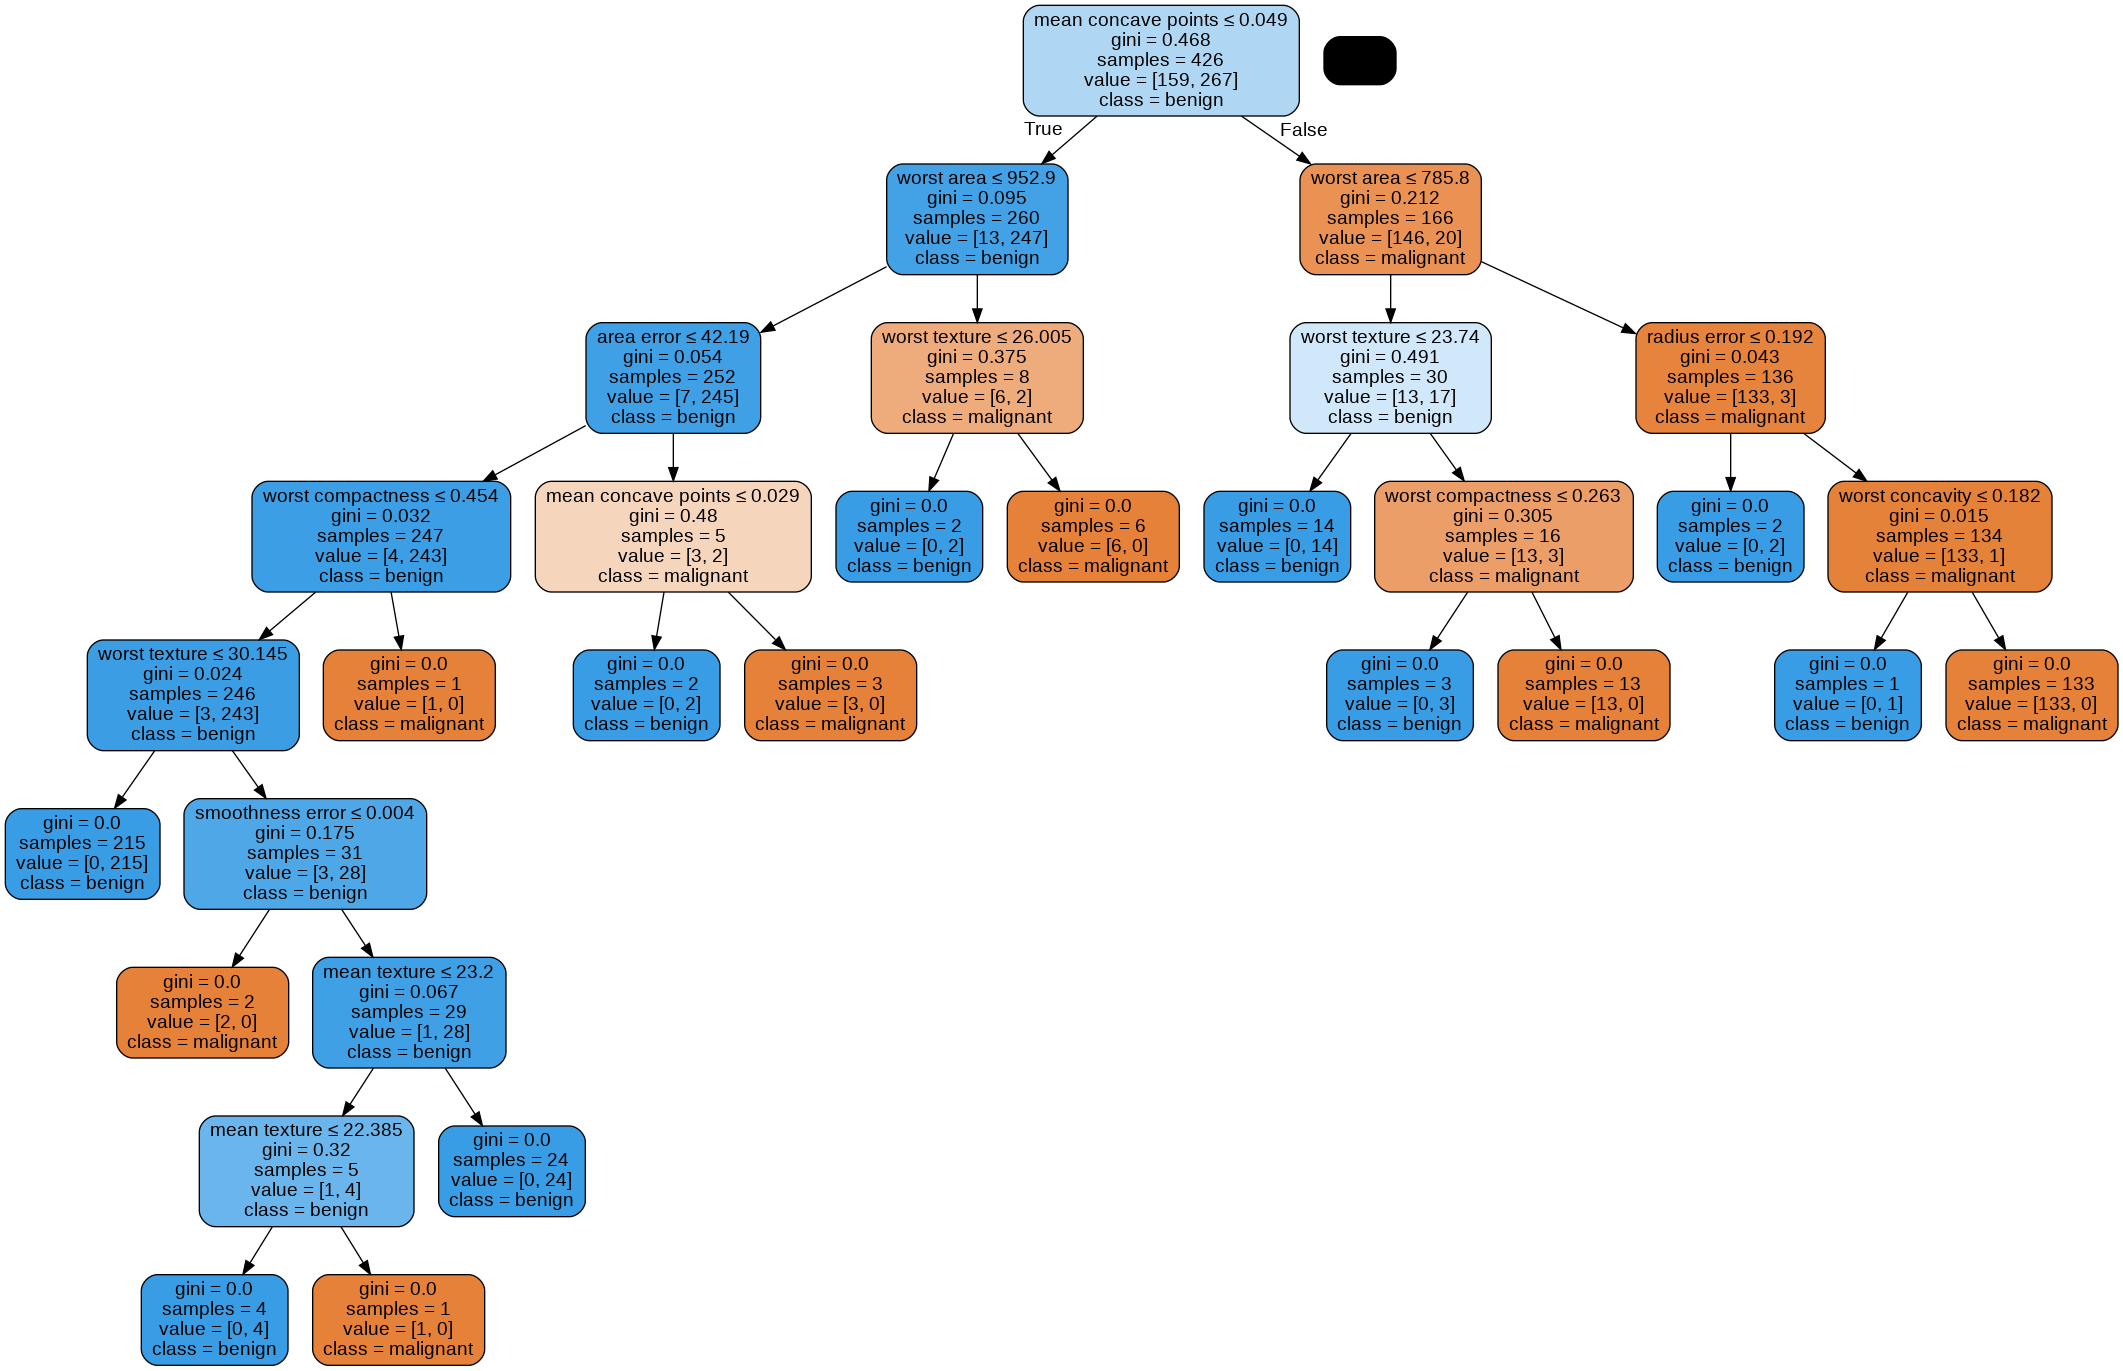

Number of nodes in the 2th tree is: 27 with ccp_alpha: 0.0022664723976040134


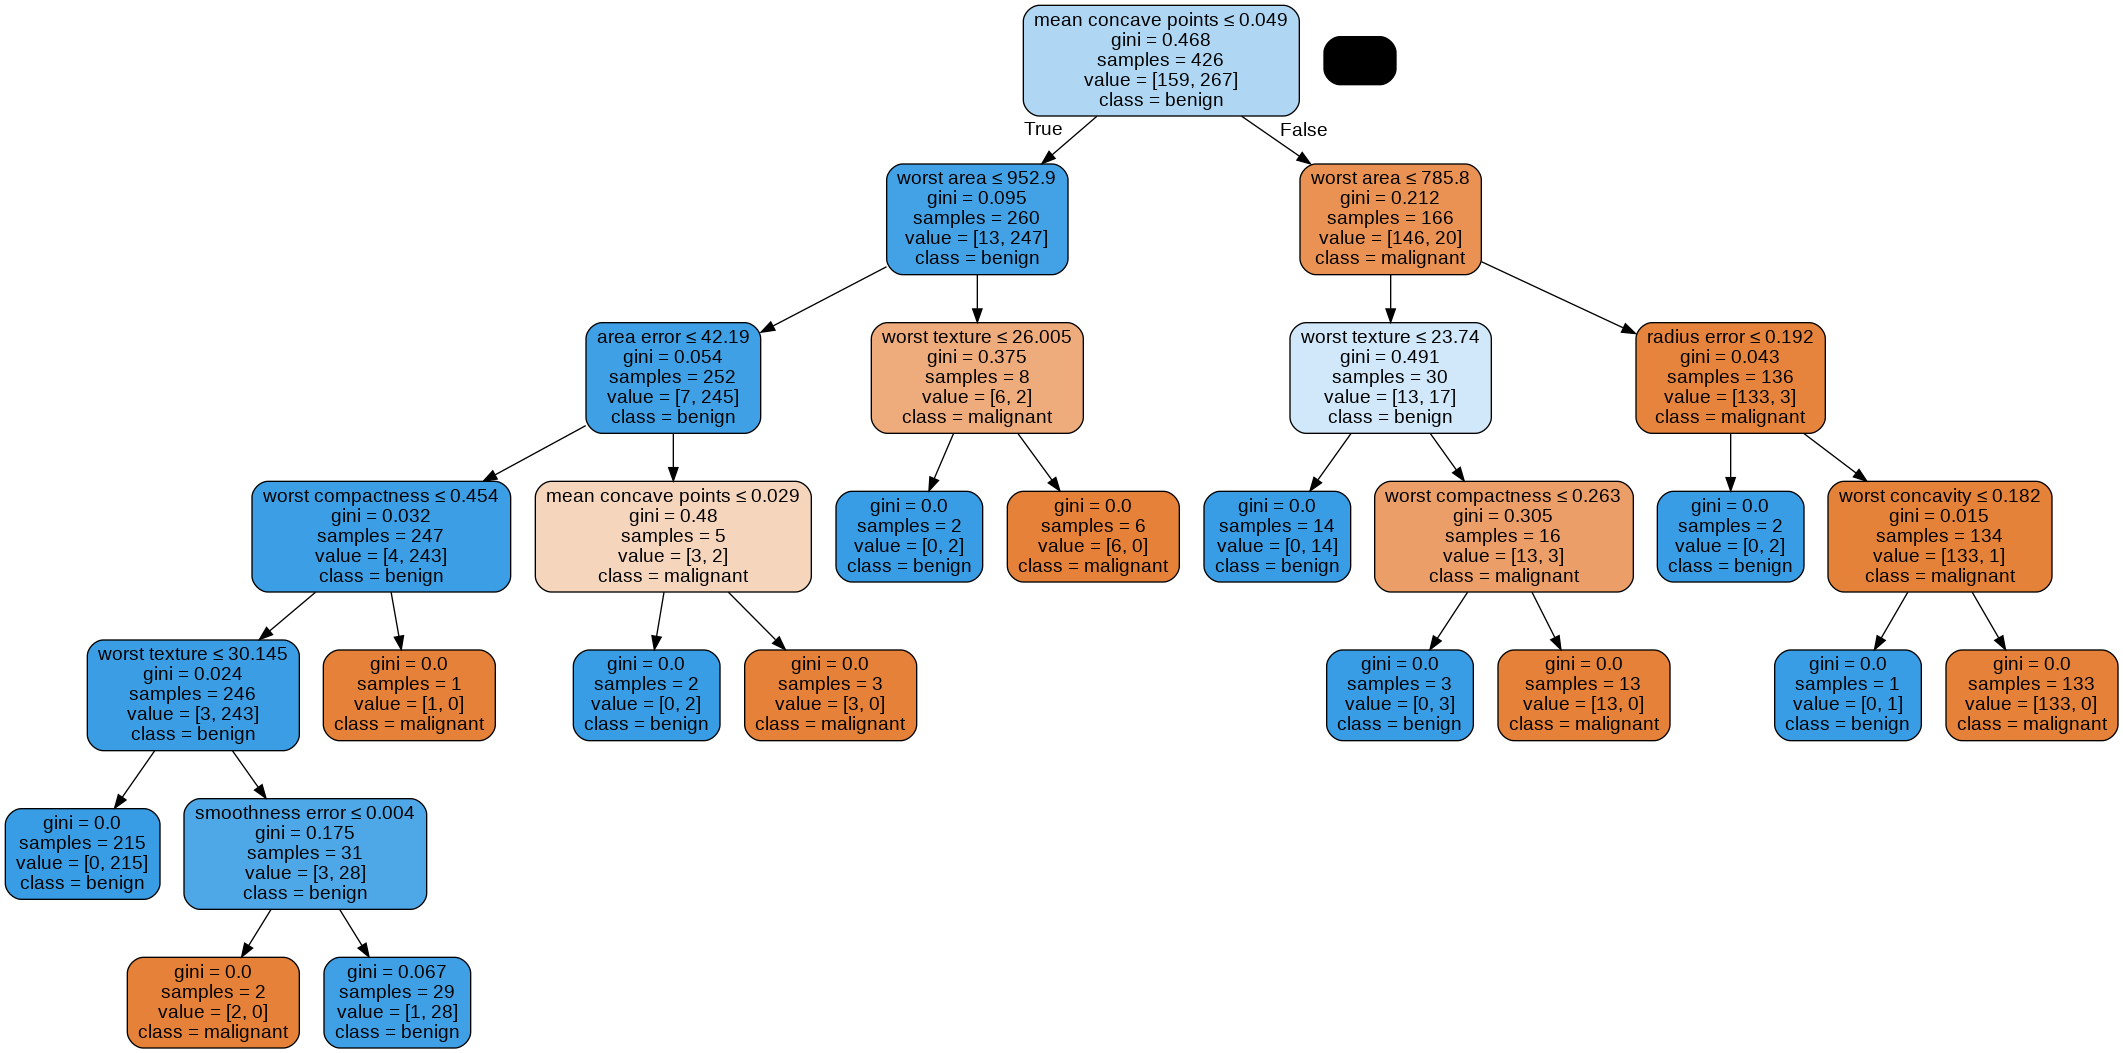

Number of nodes in the 3th tree is: 21 with ccp_alpha: 0.004647426339100881


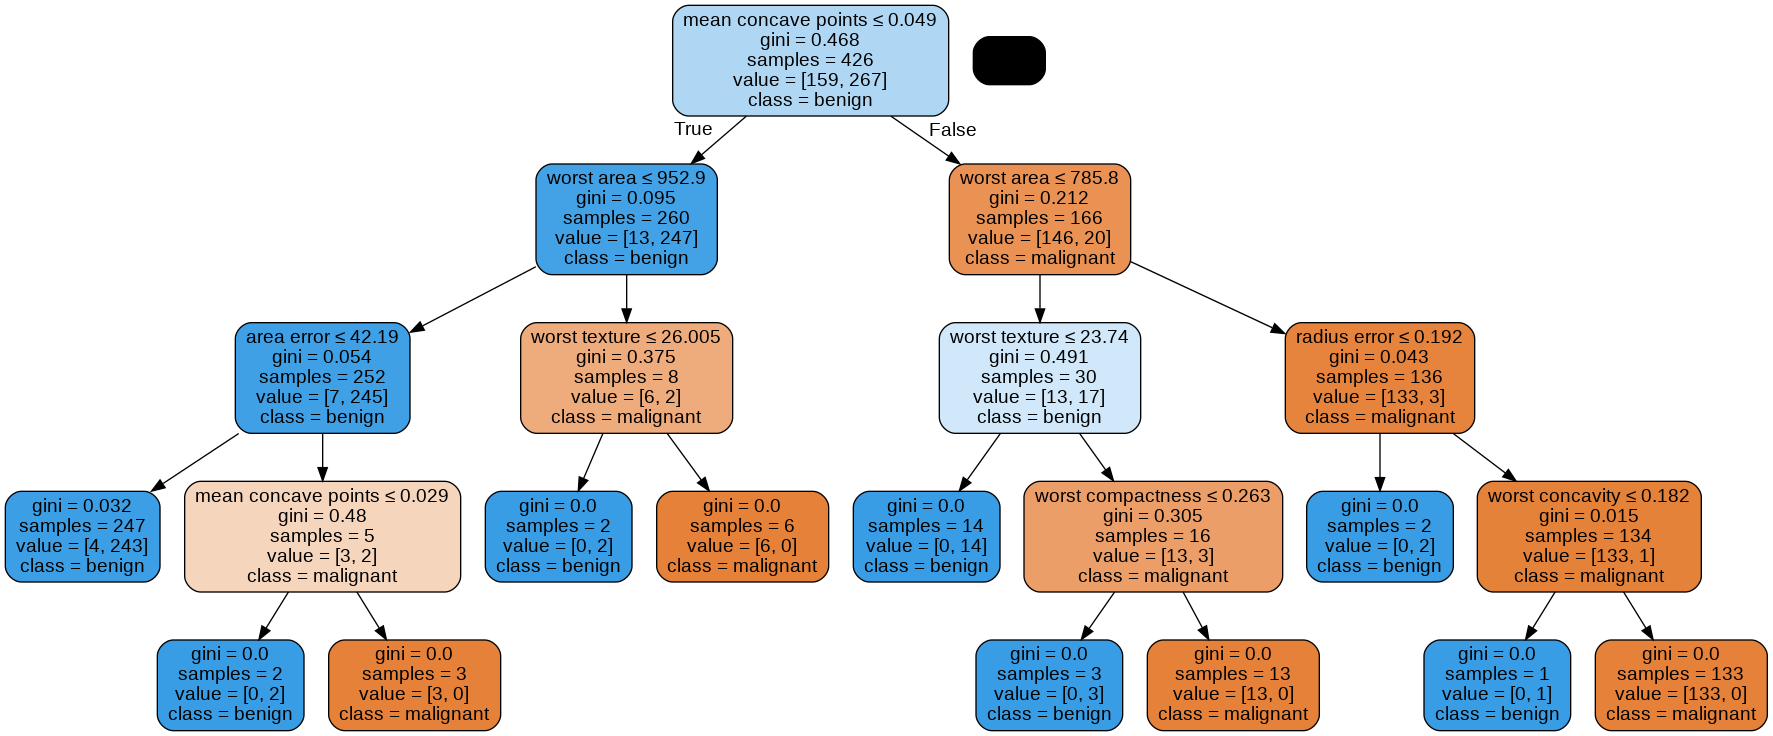

Number of nodes in the 4th tree is: 19 with ccp_alpha: 0.004659799593581376


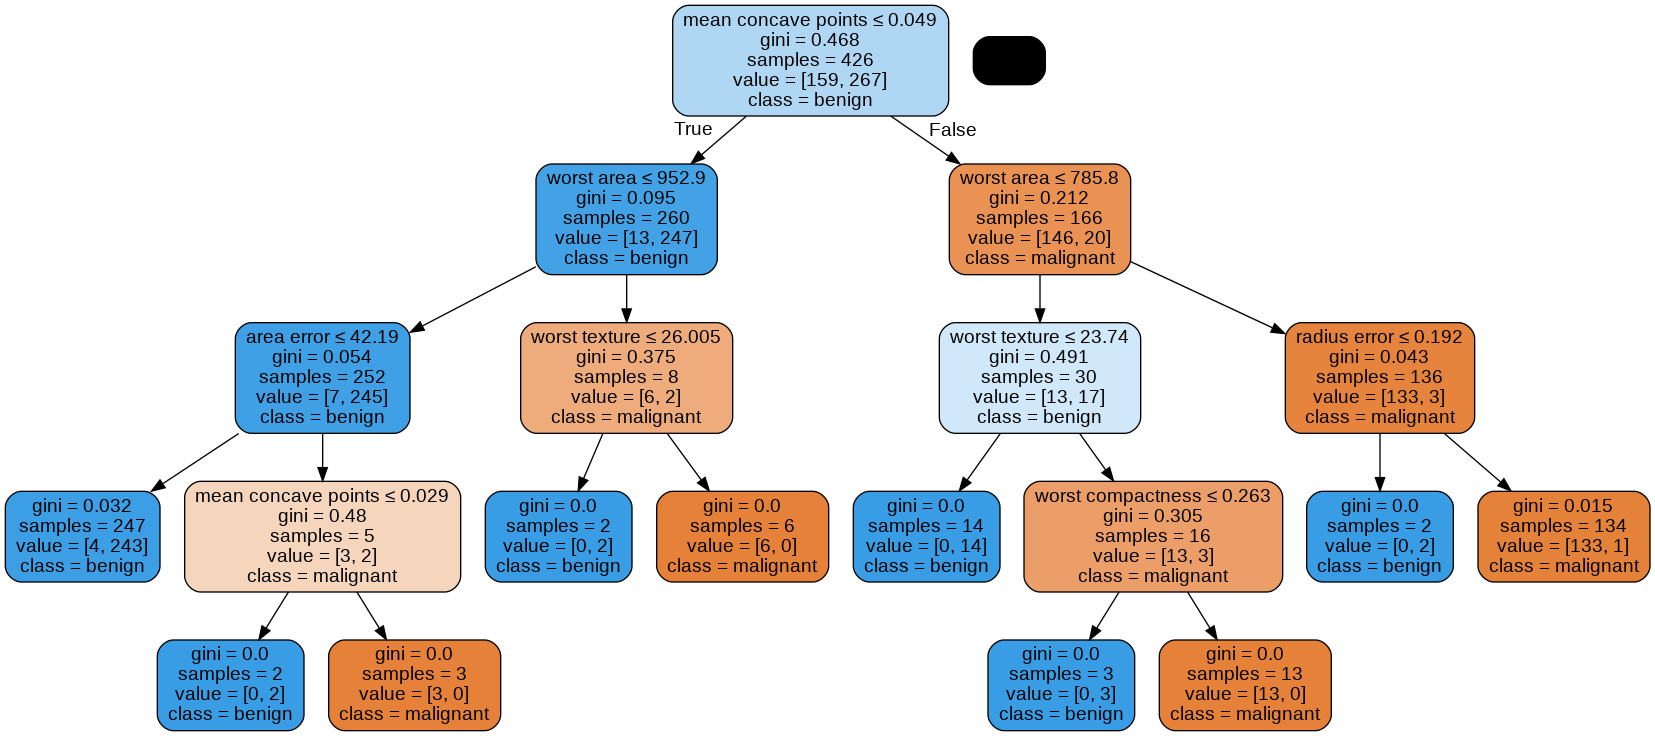

Number of nodes in the 5th tree is: 17 with ccp_alpha: 0.005633802816901408


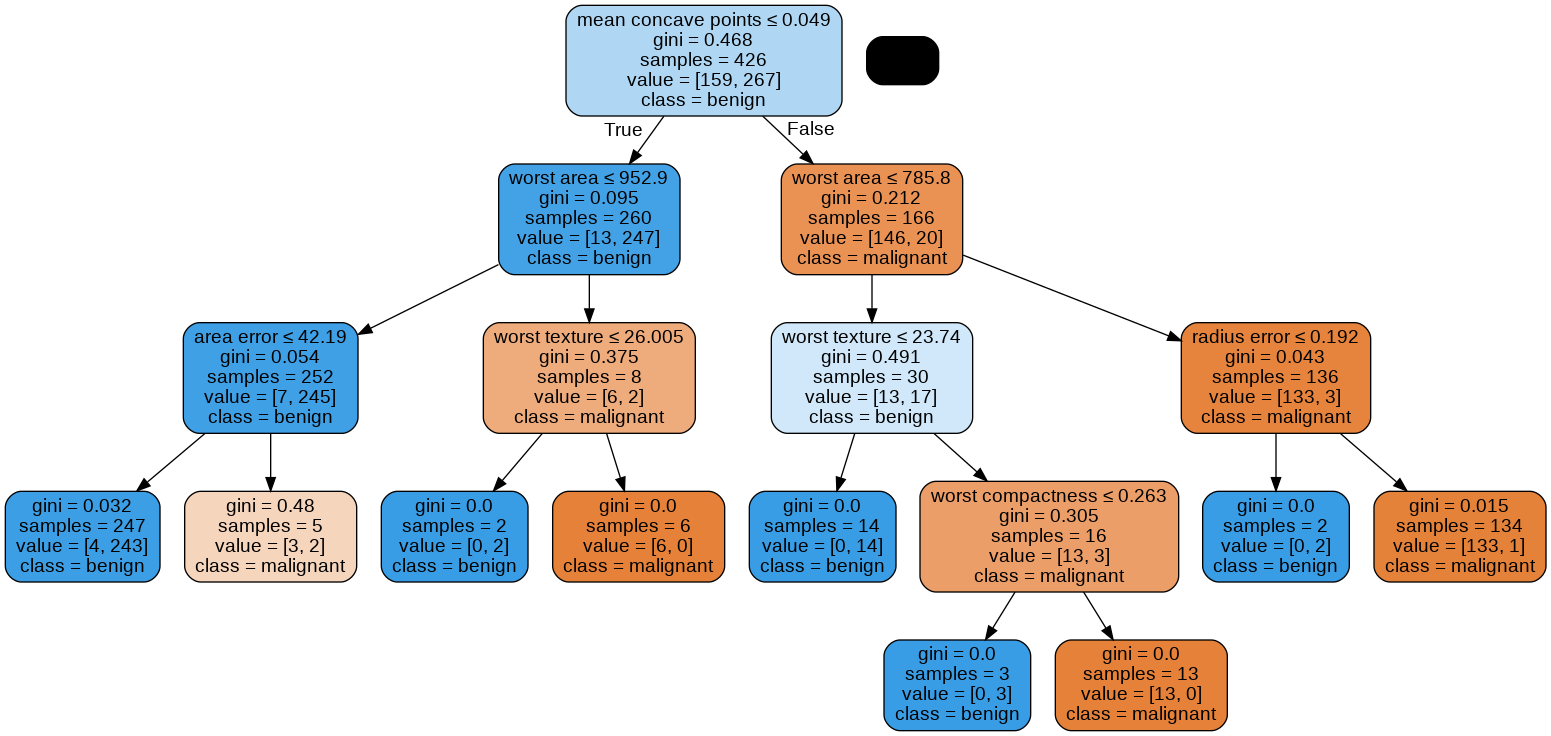

Number of nodes in the 6th tree is: 15 with ccp_alpha: 0.007042253521126761


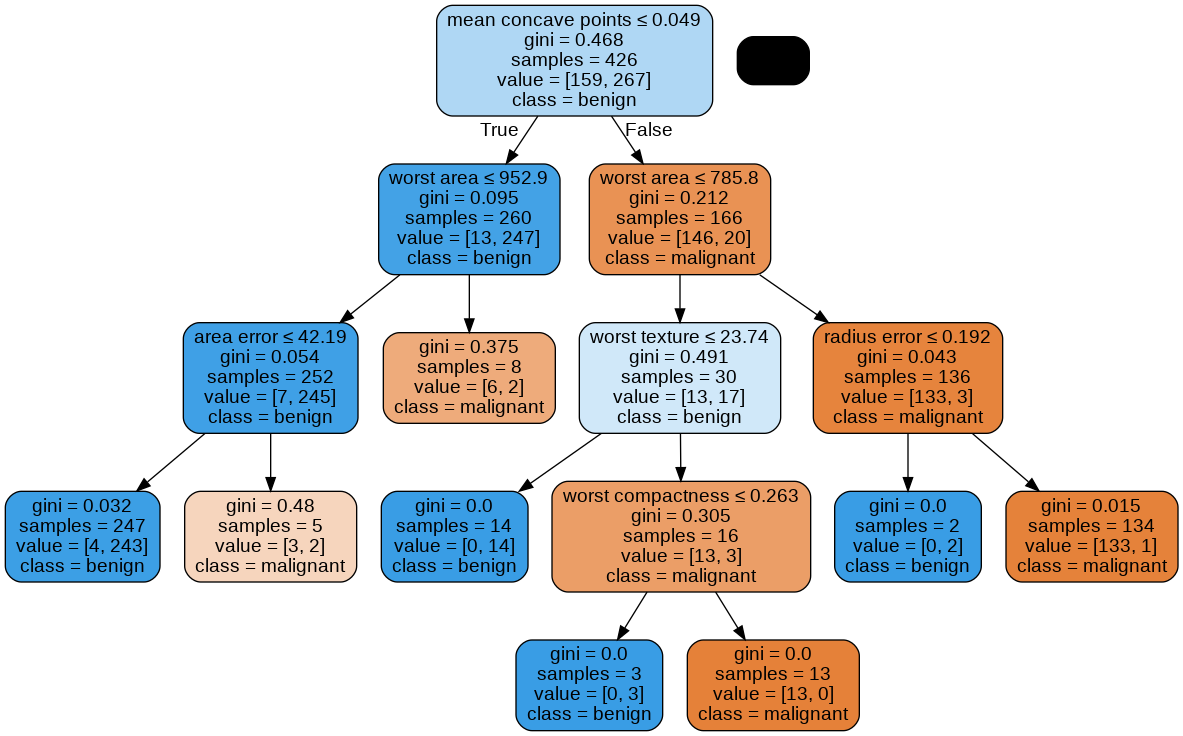

Number of nodes in the 7th tree is: 13 with ccp_alpha: 0.007841938420144537


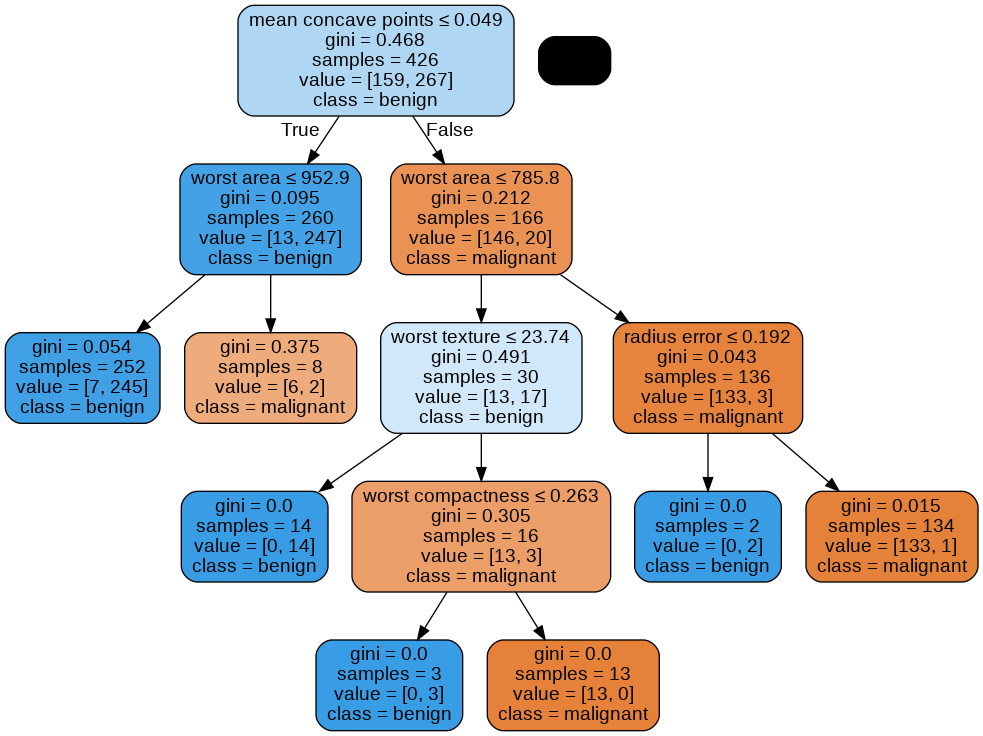

Number of nodes in the 8th tree is: 11 with ccp_alpha: 0.009114019793328328


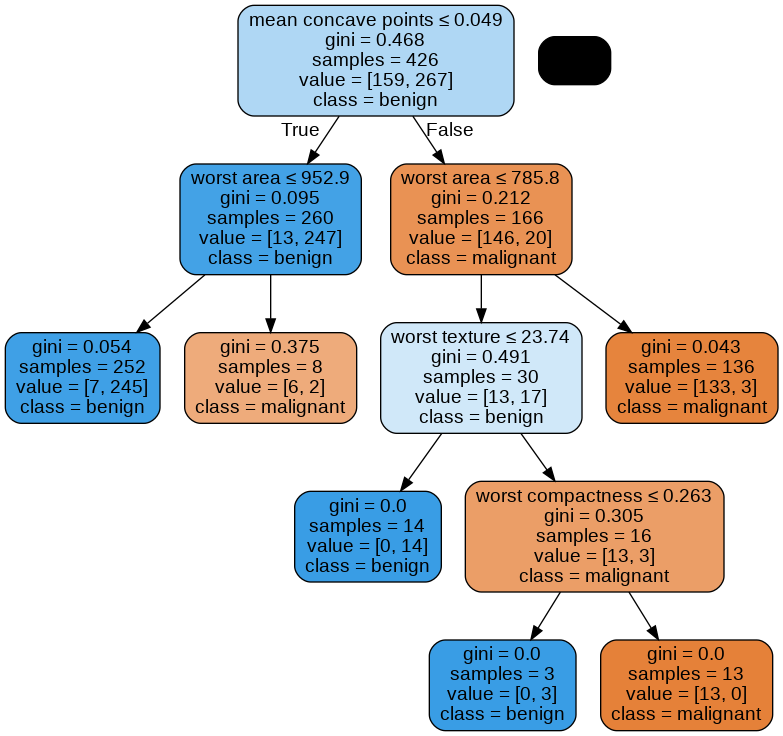

Number of nodes in the 9th tree is: 9 with ccp_alpha: 0.011443661971830986


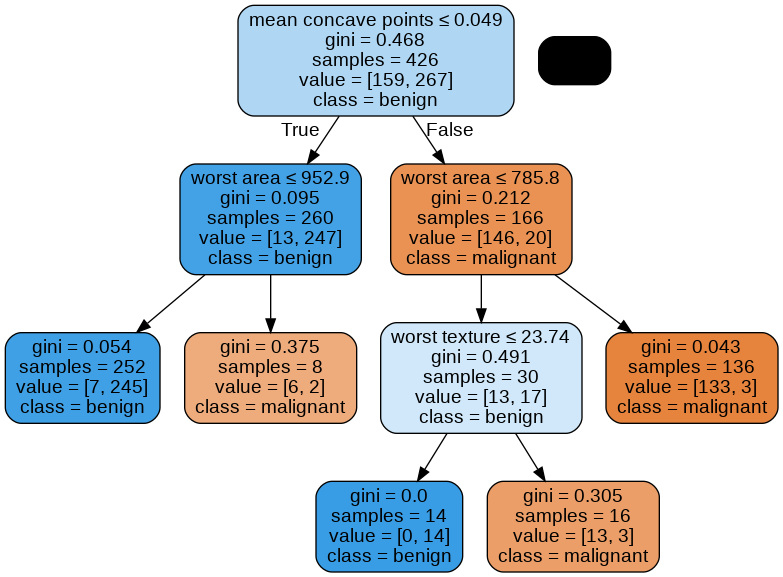

Number of nodes in the 10th tree is: 7 with ccp_alpha: 0.018988002086593604


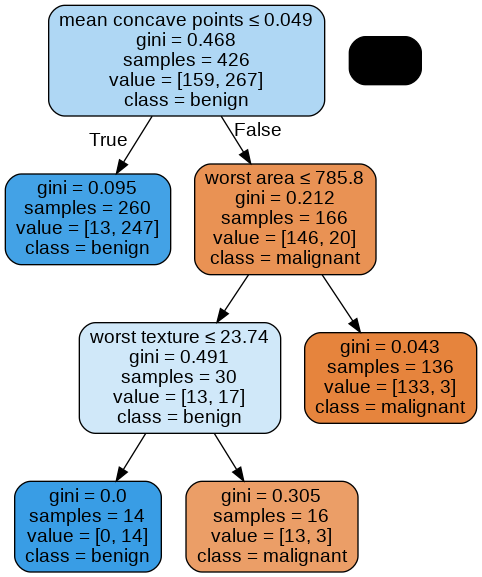

Number of nodes in the 11th tree is: 5 with ccp_alpha: 0.023141627543035996


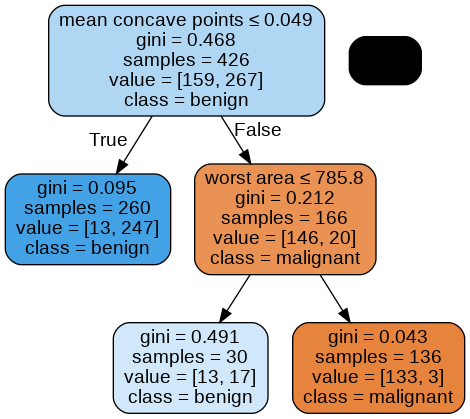

Number of nodes in the 12th tree is: 3 with ccp_alpha: 0.03422474765119576


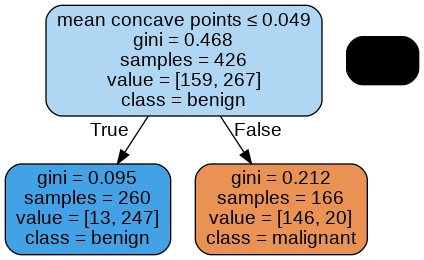

In [ ]:
# effective alpha 값에 대응하는 sub-trees 시각화

clfs = []
count = 0
for ccp_alpha in ccp_alphas:
    # 각 effective alphas 이용해 decision tree 만들기
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf = clf.fit(X_train, y_train)
    count += 1
    print("Number of nodes in the {}th tree is: {} with ccp_alpha: {}".format(
      count, clf.tree_.node_count, ccp_alpha))
    display(draw_decision_tree(clf, feature_names, class_names))
    clfs.append(clf)
    print("====================================================================================")

# ccp_alpha = 0 일 때는 not-pruned full tree
# ccp_alpha를 0부터 시작해서 크기를 늘려감, effective alpha를 지나면 가지치기
# 마지막에는 root node만 남음
# alpha에 따라서 subtree의 크기를 조정할 수 있음을 확인

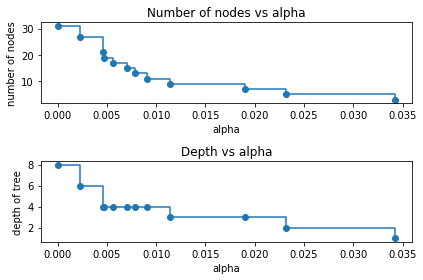

In [ ]:
# alpha값에 따른 node 수의 트리의 깊이

# 노드가 하나뿐인 마지막 tree는 제외
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# tree의 node 수
node_counts = [clf.tree_.node_count for clf in clfs]

# tree의 depth
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1)
# Number of nodes vs alpha
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
# Depth vs alpha
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

# alpha 값이 커지면 트리는 작아지므로, node의 수와 트리의 깊이도 작아짐

- Accuracy vs alpha for training and testing sets
  - alpha 값에 대응하는 subtree의 성능 확인

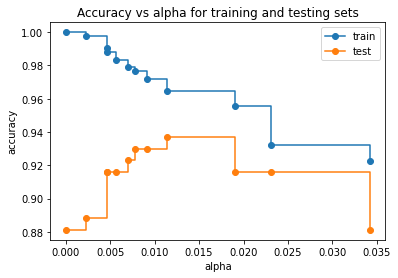

Decision tree without pruning : 31 nodes, 0.881 accuracy
Decision tree with the best pruning : 9 nodes, 0.937 accuracy


In [ ]:
# testing accuracy를 높이는 최고의 ccp_alpha는?

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

print("Decision tree without pruning : {0} nodes, {1:.3} accuracy".format(tree_nottuned.tree_.node_count, tree_nottuned.score(X_test, y_test)))
print("Decision tree with the best pruning : {0} nodes, {1:.3} accuracy".format(clfs[test_scores.index(max(test_scores))].tree_.node_count, max(test_scores)))

# 가장 높은 accuracy를 보이는 ccp_alpha 값은 약 0.013
# effective alpha = 약 0.013일 때 가장 높은 성능을 가지는 sub-tree가 만들어짐

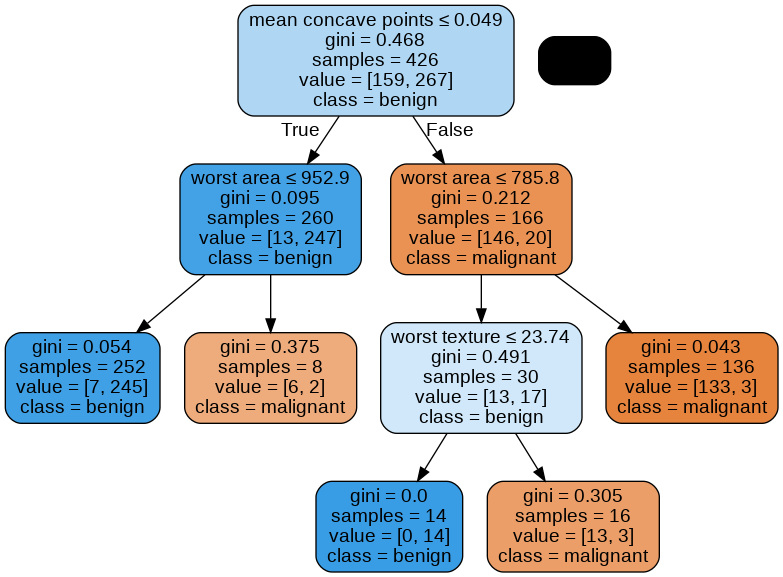

In [ ]:
# testing accuracy를 높이는 최고의 ccp_alpha
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.013)
clf = clf.fit(X_train, y_train)
draw_decision_tree(clf, feature_names, class_names)

# sub-trees 중 가장 성능 좋음
# overfitting 방지되었다고 추정

#Ensemble Method

##voting 구현

In [2]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 개별 모델을 정의해주어야 한다
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기(기본값은 하드보팅방식)
# 개별 모델을 estimators라는 리스트 인자에다가 (key, value) 튜플 형태로 넣어주기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf),
                                     ('KNN', knn_clf)],
                         voting='soft')
#데이터셋 로드 

X, y = load_breast_cancer(return_X_y=True)
feature_names = load_breast_cancer().feature_names
class_names = load_breast_cancer().target_names
#데이터셋 분할 

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=42)
# Voting분류기 학습
vo_clf.fit(x_train, y_train)
pred_y = vo_clf.predict(x_test)
print('Voting 분류기 정확도', accuracy_score(y_test, pred_y))

# LR, KNN 개별모델로도 학숩해보기
models = [lr_clf, knn_clf]
for model in models:
    model.fit(x_train, y_train)
    pred_y = model.predict(x_test)
    model_name = model.__class__.__name__
    print(f"{model_name} 정확도 :{accuracy_score(y_test, pred_y)}")


Voting 분류기 정확도 0.956140350877193
LogisticRegression 정확도 :0.9649122807017544
KNeighborsClassifier 정확도 :0.956140350877193


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


##Random Forest 구현 

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=42)

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"랜덤 포레스트 정확도 : {acc: .4f}")

랜덤 포레스트 정확도 :  0.9649


###파라미터튜닝

In [7]:
# GridSearchCV로 최적의 하이퍼파라미터 찾아주면서 교차검증 해보기
from sklearn.model_selection import GridSearchCV

# search 해볼 파라미터 정의
# n_estimators는 결합해줄 약한 분류기들 개수(디폴트값은 10)
# 나머지 하이퍼파라미터는 Decision Tree와 동일하지만 
# max_features값은 sqrt를 적용한다는 점!
params = {
    'n_estimators' : [50],
    'max_depth': [6,8,10],
    'min_samples_leaf':[8,12,16],
    'min_samples_split':[8,16,20]
}
# n_jobs = -1 로 모든 CPU 집중시키기
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params,
                      cv=2, n_jobs=-1)
grid_cv.fit(x_train, y_train)



GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10],
                         'min_samples_leaf': [8, 12, 16],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [50]})

In [8]:
# 최적의 파라미터와 최고의 성능 도출
print(f"최적의 파라미터 : {grid_cv.best_params_}")
print(f"최고 성능 : {grid_cv.best_score_}")

최적의 파라미터 : {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 50}
최고 성능 : 0.9340559548651364


In [9]:


# 위에서 도출된 최적의 파라미터로 test데이터에 검증해보기
rf_clf = RandomForestClassifier(max_depth=6, min_samples_leaf=8,
                               min_samples_split=20,
                               n_estimators=50, random_state=43)
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)

print(f"최고의 파라미터를 적용한 모델의 검증 데이터에 대한 성능:{acc:.4f}")

최고의 파라미터를 적용한 모델의 검증 데이터에 대한 성능:0.9649


#부스팅 - Gradient Boost Method

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=42)

# GBM 수행 시간 측정해보기 - 시작하는 시간
start_time = time.time()

gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)
gb_pred = gb_clf.predict(x_test)
gb_acc = accuracy_score(y_test, gb_pred)

print(f"모델 정확도 : {gb_acc :.4f}")
print(f"학습 시간 : {time.time()-start_time :.4f}")

## GridSearchCV 이용해서 교차검증&최적의 파라미터 찾기
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[20,40],
    'learning_rate':[0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf, param_grid=params,
                      n_jobs=-1, cv=2, verbose=1)
grid_cv.fit(x_train, y_train)
print("최적의 파라미터:", grid_cv.best_params_)
print("최고의 정확도 :", grid_cv.best_score_)

모델 정확도 : 0.9561
학습 시간 : 0.5050
Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적의 파라미터: {'learning_rate': 0.1, 'n_estimators': 40}
최고의 정확도 : 0.9450112064301723


#부스팅 - XGboost

In [ ]:
from xgboost import XGBClassifier

# 원래 여기 데이터에는 검증 데이터를 넣어야함 Test 데이터 넣으면 안됨!
# 검증 데이터 넣어주어서 교차검증 해보도록하기
evals = [(x_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1,
                           max_depth=3)
# eval_metric넣어주면서 검증 데이터로 loss 측정할 때 사용할 metric 지정
xgb_wrapper.fit(x_train, y_train, early_stopping_rounds=200,
               eval_set=evals, eval_metric='logloss')

preds = xgb_wrapper.predict(x_test)
preds_proba = xgb_wrapper.predict_proba(x_test)[:, 1]
print(preds_proba[:10])